# Summarize Data
11/17/23<br>
This notebook analyzes Divvy station status over time and organizes results for analysis<br>

# import libraries and set up analysis

In [20]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

# import widgets to allow yellow-highlighted user-entered filename
import ipywidgets as widgets
from IPython.display import display, HTML

In [21]:
#all this fancy code to create a yellah-highlighted textbox, emphasizing that I should give the file a meaningful name
filename_base = widgets.Text(
    description='Filename (describe the dataset):',
    value='2023_11_17_hourly',
    style={'description_width': 'initial'},
    layout=widgets.Layout(width='50%')
)

# Display the widget
display(filename_base)

# Use HTML to inject custom CSS for the text widget
style = """
<style>
    .widget-text input {
        background-color: yellow !important;
    }
</style>
"""

display(HTML(style))

Text(value='2023_11_17_hourly', description='Filename (describe the dataset):', layout=Layout(width='50%'), st…

In [22]:
#append a timestamp to prevent overwriting files
now = datetime.now()
current_timestamp=int(now.timestamp())
current_timestamp
file_suffix = f"{filename_base.value}_{current_timestamp}.csv"
file_suffix

'2023_11_17_hourly_1700405110.csv'

# import data

In [23]:
df = pd.read_csv("../results/station-status-hourly-2023-11-17.csv")

In [24]:
df.keys()

Index(['num_bikes_disabled', 'num_scooters_available', 'num_docks_available',
       'num_docks_disabled', 'is_installed', 'is_renting',
       'num_bikes_available', 'num_scooters_unavailable',
       'num_ebikes_available', 'station_id', 'is_returning', 'time_reported',
       'n_classic', 'n_electric', 'n_scooters', 'time_retrieved', 'name',
       'lat', 'lon', 'capacity', 'community', 'is_no_classic', 'is_no_docks',
       'is_problem_station', 'is_public_rack'],
      dtype='object')

# calculate and prep for analysis

In [28]:
df_stations = result = df.groupby(['station_id','name','capacity','lat','lon','community']).agg(
    no_classic_count=('is_no_classic', 'sum'),       # Count of is_no_class=True
    no_docks_count=('is_no_docks', 'sum'),       # Count of is_no_docks=True
    problem_count=('is_problem_station', 'sum'),       # either no docks or no classic bikes
    total_count=('station_id', 'size')           # Total count of records per station_id
)
df_stations["pct_no_classic"]= 100*df_stations["no_classic_count"]/df_stations["total_count"]
df_stations["pct_no_docks"]= 100*df_stations["no_docks_count"]/df_stations["total_count"]
df_stations["pct_problem"]= 100*df_stations["problem_count"]/df_stations["total_count"]
df_stations.head()

,,,,,,no_classic_count,no_docks_count,problem_count,total_count,pct_no_classic,pct_no_docks,pct_problem
station_id,name,capacity,lat,lon,community,,,,,,,
03a1610c-3ba0-4b85-b512-bc26791cb7ee,Eberhart Ave & 91st St,15,41.729285,-87.611032,CHATHAM,0,0,0,24,0.0,0.0,0.0
080ab938-2c1b-4fcf-a83d-74c5ae6ff305,Cottage Grove Ave & 111th Pl,15,41.691710,-87.610002,PULLMAN,0,0,0,24,0.0,0.0,0.0
0eeb6baf-c653-4a1a-af17-99f686116b89,Lawndale Ave & 111th St,15,41.691319,-87.712886,MOUNT GREENWOOD,0,0,0,24,0.0,0.0,0.0
0f9b826b-8885-4c25-96fd-9e2c2074c34e,Western Ave & 104th St,15,41.704587,-87.681203,BEVERLY,0,0,0,24,0.0,0.0,0.0
10327d47-3c3a-433e-9e38-80638da64232,Indiana Ave & 103rd St,15,41.707170,-87.618472,ROSELAND,0,0,0,24,0.0,0.0,0.0


In [29]:
df_stations = df_stations.reset_index()

In [30]:
df_stations.columns

Index(['station_id', 'name', 'capacity', 'lat', 'lon', 'community',
       'no_classic_count', 'no_docks_count', 'problem_count', 'total_count',
       'pct_no_classic', 'pct_no_docks', 'pct_problem'],
      dtype='object')

# assign binning for values
for this analysis, the categories will be colored red-orange-yellow-green-blue based on the bins<br>
focusing on percent with no classic bikes

In [64]:
# Define bin edges and labels for the bins
bin_edges = [0, 1, 15, 30, 99, 100]
bin_labels = ['0%', '1-14%', '15-29%', '30-99%', '100%']

In [65]:
# Use pd.cut to bin the data
df_stations['bin_no_classic'] = pd.cut(df_stations['pct_no_classic'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df_stations['bin_no_docks'] = pd.cut(df_stations['pct_no_docks'], bins=bin_edges, labels=bin_labels, include_lowest=True)
df_stations['bin_problem'] = pd.cut(df_stations['pct_problem'], bins=bin_edges, labels=bin_labels, include_lowest=True)

### filtered dataset for Logan and Humboldt analysis

In [66]:
df_stations_logan_humboldt= df_stations[(
    df_stations['community']=='LOGAN SQUARE') | (df_stations['community'] == 'HUMBOLDT PARK')]
len(df_stations_logan_humboldt)

37

In [67]:
df_stations_humboldt= df_stations[(
    df_stations['community'] == 'HUMBOLDT PARK')]
len(df_stations_humboldt)

11

### Preview Data Distribution

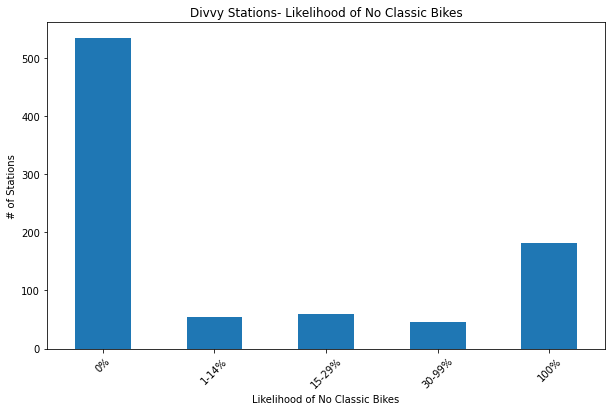

In [68]:
# Now plot the binned data
plt.figure(figsize=(10, 6))
df_stations['bin_no_classic'].value_counts().reindex(bin_labels).plot(kind='bar')
plt.title('Divvy Stations- Likelihood of No Classic Bikes')
plt.xlabel('Likelihood of No Classic Bikes')
plt.ylabel('# of Stations')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()

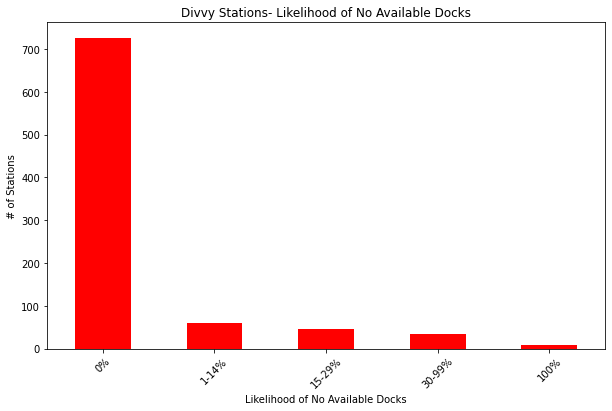

In [69]:
# Now plot the binned data
plt.figure(figsize=(10, 6))
df_stations['bin_no_docks'].value_counts().reindex(bin_labels).plot(kind='bar',color="red")
plt.title('Divvy Stations- Likelihood of No Available Docks')
plt.xlabel('Likelihood of No Available Docks')
plt.ylabel('# of Stations')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()

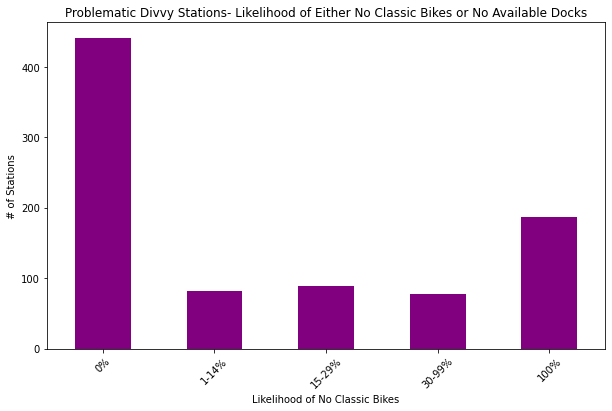

In [70]:
# Now plot the binned data
plt.figure(figsize=(10, 6))
df_stations['bin_problem'].value_counts().reindex(bin_labels).plot(kind='bar',color="purple")
plt.title('Problematic Divvy Stations- Likelihood of Either No Classic Bikes or No Available Docks')
plt.xlabel('Likelihood of No Classic Bikes')
plt.ylabel('# of Stations')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.show()

# Export for Flourish

In [71]:
#citywide data
df_stations.to_csv(f"../results/stations_summary_{file_suffix}")

#humboldt & logan
df_stations_logan_humboldt.to_csv(f"../results/stations_summary_lsq_humboldt_{file_suffix}")

#humboldt
df_stations_humboldt.to_csv(f"../results/stations_summary_humboldt_{file_suffix}")

In [129]:
# cc to my desktop
# the 'r' is to escape the backslash for Unix
#df_stations.to_csv(fr"C:\Users\relia\OneDrive\Desktop\stations_summary_{file_suffix}")